# Assignment 6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_fwf("C:/Users/Priyanka C/Desktop/Guvi Projects/Task 6/Assignment 6/brain_body.txt")

In [3]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [4]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [6]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [7]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


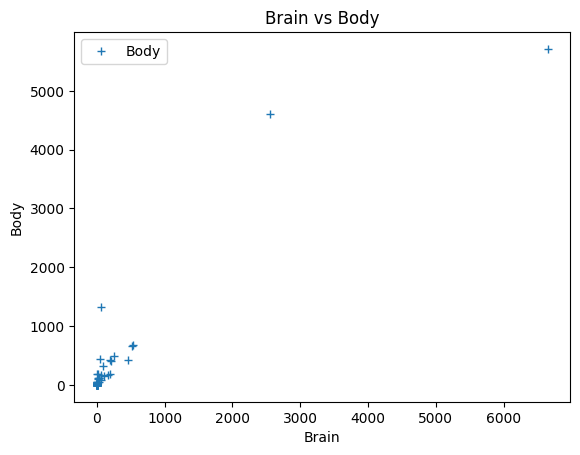

In [8]:
df.plot(x='Brain', y='Body', style='+')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [9]:
X = df[['Brain']].values
Y = df[['Body']].values

#### Splitting the data set into test and train

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.4,random_state = 3)

In [11]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, Y_train) 
Y_pred = regressor.predict(X_test)

### 1.Find the linear regression equation for this data for brain weight to body weight.

In [12]:
m = regressor.coef_
c = regressor.intercept_
## we have the value of the intercept and the coefficient so now we will form the equation
## y = m*x + c
print("Prediction Body (Y) = {} * Brain (x) + {}".format(m[0],c))

Prediction Body (Y) = [0.85612167] * Brain (x) + [55.68554239]


In [13]:
Y_pred

array([[ 107.05284283],
       [2236.22744643],
       [  56.45605189],
       [  55.68982299],
       [  55.78827699],
       [  64.24675913],
       [  68.38182681],
       [ 232.90272893],
       [  56.54166406],
       [  58.68196825],
       [  55.85676672],
       [ 108.76508618],
       [ 100.34084891],
       [  86.78844281],
       [  85.64980098],
       [  56.0493941 ],
       [  55.78998923],
       [ 220.06090382],
       [  56.32763364],
       [  59.31121768],
       [  64.71762605],
       [  57.39778573],
       [  58.68196825],
       [  55.92525645],
       [  56.47317433]])

In [14]:
Y_test

array([[8.100e+01],
       [4.603e+03],
       [2.600e+00],
       [1.400e-01],
       [1.000e+00],
       [1.150e+02],
       [9.820e+01],
       [4.060e+02],
       [6.600e+00],
       [3.900e+00],
       [5.000e+00],
       [1.320e+03],
       [4.400e+02],
       [1.195e+02],
       [5.600e+01],
       [6.400e+00],
       [3.000e+00],
       [1.800e+02],
       [1.230e+01],
       [5.040e+01],
       [1.795e+02],
       [1.230e+01],
       [1.080e+01],
       [1.900e+00],
       [5.700e+00]])

In [15]:
print("Prediction Body (Y) = {} * Brain (x) + {}".format(m[0],c))

Prediction Body (Y) = [0.85612167] * Brain (x) + [55.68554239]


### 2. Chart the original data and the equation on the chart.

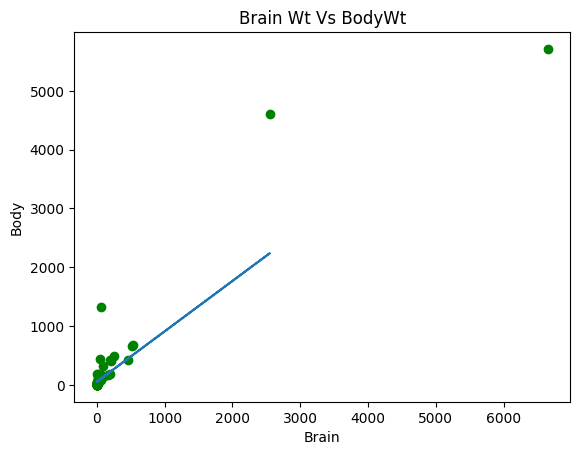

In [16]:
plt.scatter(X, Y, color='green')
plt.plot(X_test, Y_pred)
plt.title('Brain Wt Vs BodyWt')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

### 3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation)

In [17]:
## yes from the r2 score we got a score of 65 which is a very bad fit
from sklearn import metrics 
R2_score =  metrics.r2_score(Y_test,Y_pred)
print(R2_score)

0.6541661717624343


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2fef39870>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2fef39db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2fef395d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2fef3a2f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2fef3a590>],
 'means': []}

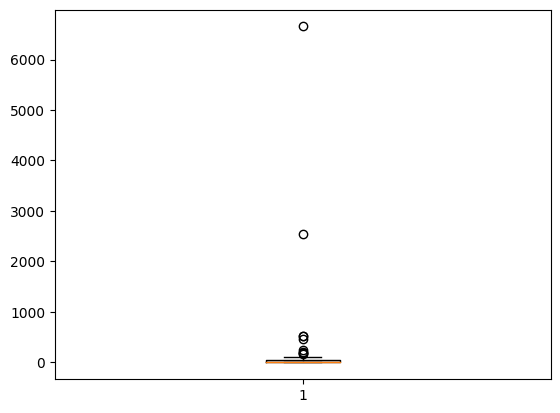

In [18]:
plt.boxplot(df['Brain'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2fed8c850>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2fed8cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2fed8c5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2fed8d2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2fed8d570>],
 'means': []}

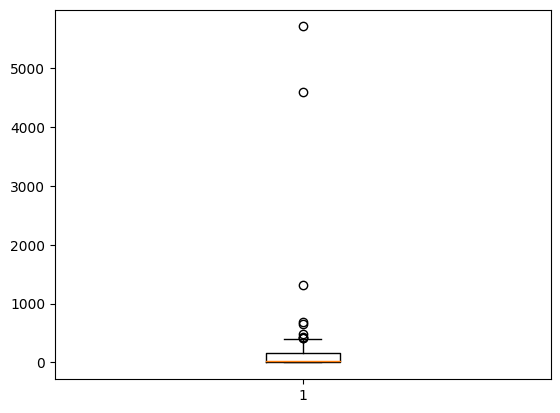

In [19]:
plt.boxplot(df['Body'].values)

## Less R2 score due to outliers

In [20]:
percentile25 = df['Body'].quantile(0.25)
percentile75 = df['Body'].quantile(0.75)
percentile25 = df['Brain'].quantile(0.25)
percentile75 = df['Brain'].quantile(0.75)
df1 = df[(df['Brain']>percentile25) & (df['Brain']<percentile75)]
df1 = df[(df['Body']>percentile25) & (df['Body']<percentile75)]
df1

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
7,1.040,5.5
9,0.425,6.4
10,0.101,4.0
11,0.920,5.7
12,1.000,6.6
14,0.060,1.0
15,3.500,10.8


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2feddb6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2feddbbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2feddb400>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2fee08160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2fee08400>],
 'means': []}

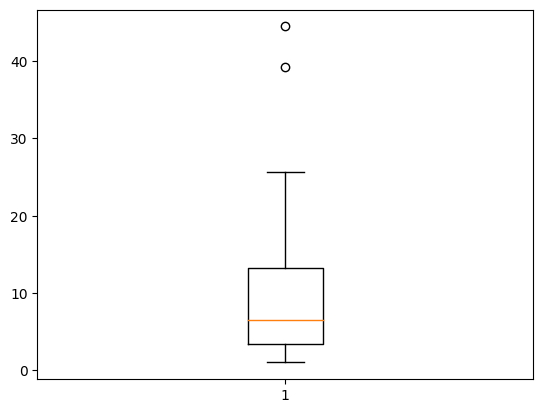

In [21]:
plt.boxplot(df1['Body'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2fee58310>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2fee59c60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2fee59570>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2fee5a1a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2fee5a440>],
 'means': []}

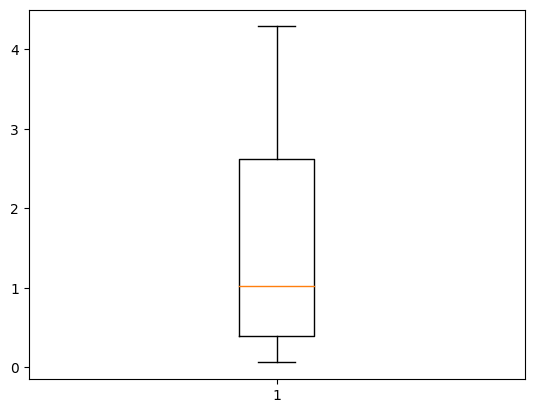

In [22]:
plt.boxplot(df1['Brain'].values)

## Now the outliers have decreased

In [23]:
X = df1[['Brain']].values
Y = df1[['Body']].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.4,random_state = 4)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, Y_train) 
Y_pred = regressor.predict(X_test)

m = regressor.coef_
c = regressor.intercept_
## we have the value of the intercept and the coefficient so now we will form the equation
## y = m*x + c
print('Task 1')
print("Prediction Body (Y) = {} * Brain (x) + {}".format(m[0],c))

Task 1
Prediction Body (Y) = [5.5072193] * Brain (x) + [2.14295327]


Task2


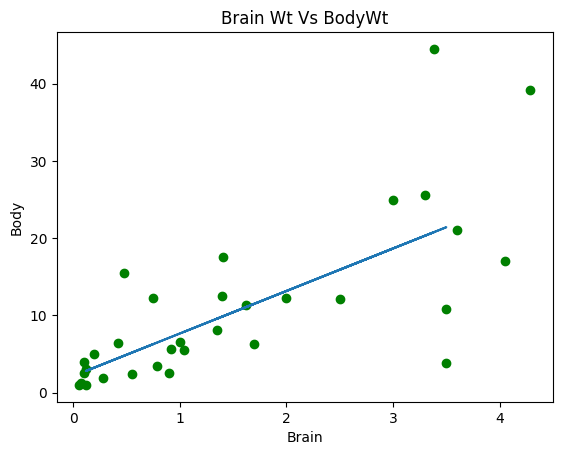

In [24]:
print('Task2')
plt.scatter(X, Y, color='green')
plt.plot(X_test, Y_pred)
plt.title('Brain Wt Vs BodyWt')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [25]:
## yes from the r2 score we got a score of 65 which is a very bad fit
from sklearn import metrics 
R2_score =  metrics.r2_score(Y_test,Y_pred)
print(R2_score)

0.3720800433536118
